In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from tensorflow.keras.utils import to_categorical

Load CIFAR-10 dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Normalize pixel values to between 0 and 1

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

One-hot encode the labels

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Choose between ResNet50 or VGG16

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Freeze the convolutional base

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

Add custom dense layers

In [ ]:
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)


Create the final model

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Train the model

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 687s 876ms/step - accuracy: 0.4824 - loss: 1.4907 - val_accuracy: 0.5665 - val_loss: 1.2327
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 698s 821ms/step - accuracy: 0.5903 - loss: 1.1758 - val_accuracy: 0.5662 - val_loss: 1.2232
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 681s 819ms/step - accuracy: 0.6135 - loss: 1.1046 - val_accuracy: 0.6026 - val_loss: 1.1418
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 682s 819ms/step - accuracy: 0.6347 - loss: 1.0432 - val_accuracy: 0.6097 - val_loss: 1.1160
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 719s 866ms/step - accuracy: 0.6560 - loss: 0.9885 - val_accuracy: 0.6057 - val_loss: 1.1162
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 645s 820ms/step - accuracy: 0.6704 - loss: 0.9463 - val_accuracy: 0.6180 - val_loss: 1.1032
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 683s 821ms/step - accuracy: 0.6862 - loss: 0.9047 - val_accuracy: 0.6162 - val_loss: 1.0936
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 642s 821ms/step - accuracy: 0.7013 -

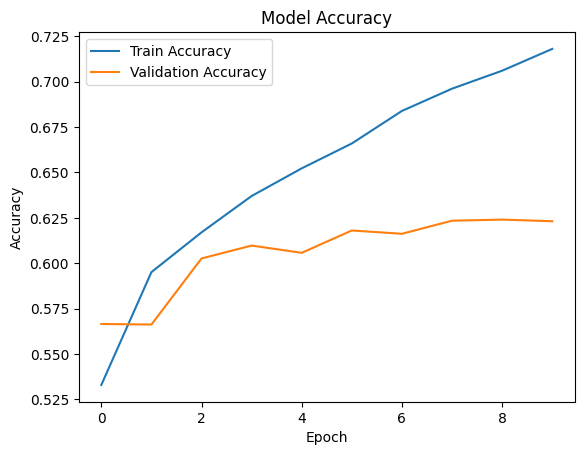

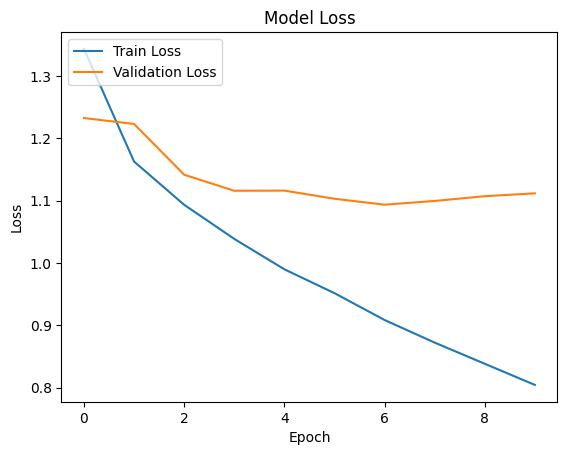

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


Evaluate the model on the test set

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=-1)
y_true = y_test.argmax(axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 112s 356ms/step


Calculate accuracy, precision, and recall

In [ ]:
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.6231
Precision: 0.6313641408694284
Recall: 0.6231


Display classification report

In [ ]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.64      0.78      0.70      1000
           1       0.69      0.71      0.70      1000
           2       0.64      0.46      0.53      1000
           3       0.43      0.52      0.47      1000
           4       0.58      0.56      0.57      1000
           5       0.57      0.49      0.53      1000
           6       0.57      0.76      0.65      1000
           7       0.75      0.63      0.69      1000
           8       0.79      0.69      0.73      1000
           9       0.65      0.65      0.65      1000

    accuracy                           0.62     10000
   macro avg       0.63      0.62      0.62     10000
weighted avg       0.63      0.62      0.62     10000

